### Analisi tecnica

### Medie mobili semplici ed esponenziali (MACD)
Fonte: https://www.youtube.com/watch?v=7_dxjNx2PdE&list=PLLDx60G0MrKZ66gCSCM0wvBYKfIXzv7GA&index=3&ab_channel=Pythonenthusiast


L'acronimo MACD significa Moving Averages Convergence Divergence. Si tratta forse della strategia più utilizzata[1] dagli analisti e prevede di generare segnali all'incrocio tra due medie mobili (doppio crossover); vengono utilizzate due medie, ovviamente di periodo differente. Quando quella più veloce, ovvero generata da un periodo minore, incrocerà al rialzo quella più lenta verrà generato un segnale di acquisto; viceversa quando quella lenta sarà tagliata al ribasso da quella più veloce si avrà la vendita. Anche qui i periodi scelti per la creazione delle medie mobili avranno effetto sui segnali generati: se si vorrà seguire andamenti di maggiore respiro sarà necessario aumentare i periodi delle due medie mobili, mentre se si vorranno cavalcare i movimenti di breve periodo si potranno utilizzare due medie mobili più veloci.
Fonte: Wikipedia

In [57]:
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import numpy as np

style.use('ggplot')

Importiamo i dati

In [58]:
start = dt.datetime(2014, 5,31)
end = dt.datetime(2024,5, 21)
ticker = 'AAPL'
data = yf.download(ticker, start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])

[*********************100%%**********************]  1 of 1 completed


Creiamo le due serie di medie mobili, una a 20 giorni (1 mese circa) una a 120 giorni (6 mesi circa)

In [59]:

data['SMA20'] = data['Adj Close'].rolling(20).mean()
data['SMA120'] = data['Adj Close'].rolling(120).mean()


In [60]:
data.head(21)

,Adj Close,Volume,SMA20,SMA120
Date,,,,
2014-06-02,19.859394,369350800,NaN,NaN
2014-06-03,20.140238,292709200,NaN,NaN
2014-06-04,20.370209,335482000,NaN,NaN
2014-06-05,20.450134,303805600,NaN,NaN
2014-06-06,20.393906,349938400,NaN,NaN
2014-06-09,20.720242,301660000,NaN,NaN
2014-06-10,20.841856,251108000,NaN,NaN
2014-06-11,20.755619,182724000,NaN,NaN
2014-06-12,20.408438,218996000,NaN,NaN


In [61]:
data.tail()

,Adj Close,Volume,SMA20,SMA120
Date,,,,
2024-05-14,187.429993,52393600,174.736253,181.770830
2024-05-15,189.720001,70400000,175.833630,181.767337
2024-05-16,189.839996,52845200,176.984943,181.759275
2024-05-17,189.869995,41282900,178.239618,181.762601
2024-05-20,191.039993,44361300,179.510850,181.777173


Grafico della serie originale e delle due medie mobili

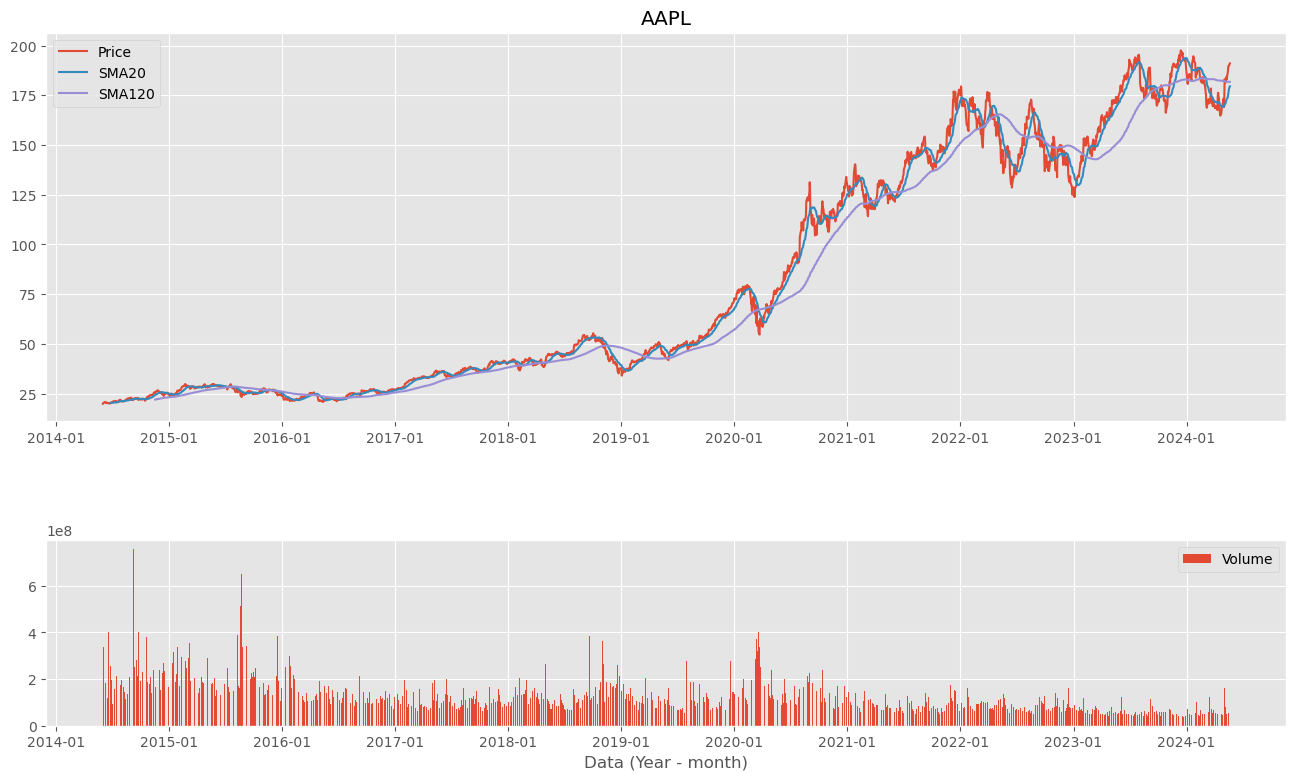

In [62]:

plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((7,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((7,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')

ax2.bar(data.index, data['Volume'], label = 'Volume')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.set_xlabel('Data (Year - month)')
ax1.legend()
ax2.legend();


Creiamo la strategia

In [7]:
data['Price_yesterday'] = data['Adj Close'].shift(1)
data['Change'] = data['Adj Close'] / data['Price_yesterday']
data['Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                        else 0 for i in data.index]

Rendimento della strategia

In [8]:
sma = data[data['Invested_SMA'] == 1]

In [9]:
sma.head()

,Adj Close,Volume,SMA20,SMA120,Price_yesterday,Change,Invested_SMA
Date,,,,,,,
2014-11-18,25.772604,176896000,24.249850,21.972352,25.442263,1.012984,1
2014-11-19,25.594044,167476800,24.385159,22.020140,25.772604,0.993072,1
2014-11-20,25.960087,173582000,24.518325,22.068639,25.594044,1.014302,1
2014-11-21,25.995802,228717200,24.648944,22.115519,25.960087,1.001376,1
2014-11-24,26.477905,189803200,24.804890,22.165751,25.995802,1.018545,1


In [63]:
sma.loc[:,'Return'] = np.cumprod(sma['Change'])

In [65]:
sma.head()

,Adj Close,Volume,SMA20,SMA120,EWM12,EWM26,Price_yesterday,Change,Invested_SMA,Invested_EWM,Buy_and_hold,Return
Date,,,,,,,,,,,,
2015-02-06,18.714001,77848000,15.977525,15.892617,17.213701,16.344865,18.694500,1.001043,1,1,1.211890,1.001043
2015-02-09,18.528000,54492000,16.161600,15.907629,17.415901,16.506579,18.714001,0.990061,1,1,1.199845,0.991094
2015-02-10,18.650000,45744000,16.365575,15.923408,17.605762,16.665351,18.528000,1.006585,1,1,1.207745,0.997620
2015-02-11,18.757000,55730000,16.566575,15.939808,17.782876,16.820288,18.650000,1.005737,1,1,1.214674,1.003343
2015-02-12,18.858500,55822000,16.776325,15.958250,17.948356,16.971266,18.757000,1.005411,1,1,1.221247,1.008773


In [66]:
sma.loc[:,'rtn'] =sma['Return'].pct_change()
print(sma['rtn'])

Date
2015-02-06         NaN
2015-02-09   -0.009939
2015-02-10    0.006585
2015-02-11    0.005737
2015-02-12    0.005411
                ...   
2024-05-14    0.002680
2024-05-15   -0.005773
2024-05-16   -0.012689
2024-05-17    0.005827
2024-05-20   -0.006280
Name: rtn, Length: 1662, dtype: float64


In [16]:
sma['rtn'].mean()*252

0.21383199252114626

In [17]:
sma['rtn'].std()*np.sqrt(252)

0.2702614128880944

In [18]:
sma['rtn'].mean()*252 / (sma['rtn'].std()*np.sqrt(252))

0.7912043019241021

Rendimento del buy and hold

In [71]:
#data.loc[:,'Buy_and_hold'] = np.cumprod(data['Change'])
#data['rtn'] = data['Buy_and_hold'].pct_change()
data['rtn'] = data['Adj Close']/data['Adj Close'].shift(1)-1
print(data['rtn'].mean()*252)
print(data['rtn'].std()*np.sqrt(252))

0.26765043868200633
0.2834585864770234


In [77]:
data['Buy_and_hold'] = np.cumprod(1+data['rtn'])
print(data['Buy_and_hold'])

Date
2014-06-02         NaN
2014-06-03    1.014142
2014-06-04    1.025722
2014-06-05    1.029746
2014-06-06    1.026915
                ...   
2024-05-14    9.437851
2024-05-15    9.553162
2024-05-16    9.559204
2024-05-17    9.560714
2024-05-20    9.619629
Name: Buy_and_hold, Length: 2510, dtype: float64


In [72]:
data['rtn'].mean()*252 / (data['rtn'].std()*np.sqrt(252))

0.9442311909069707

Confronto fra i due

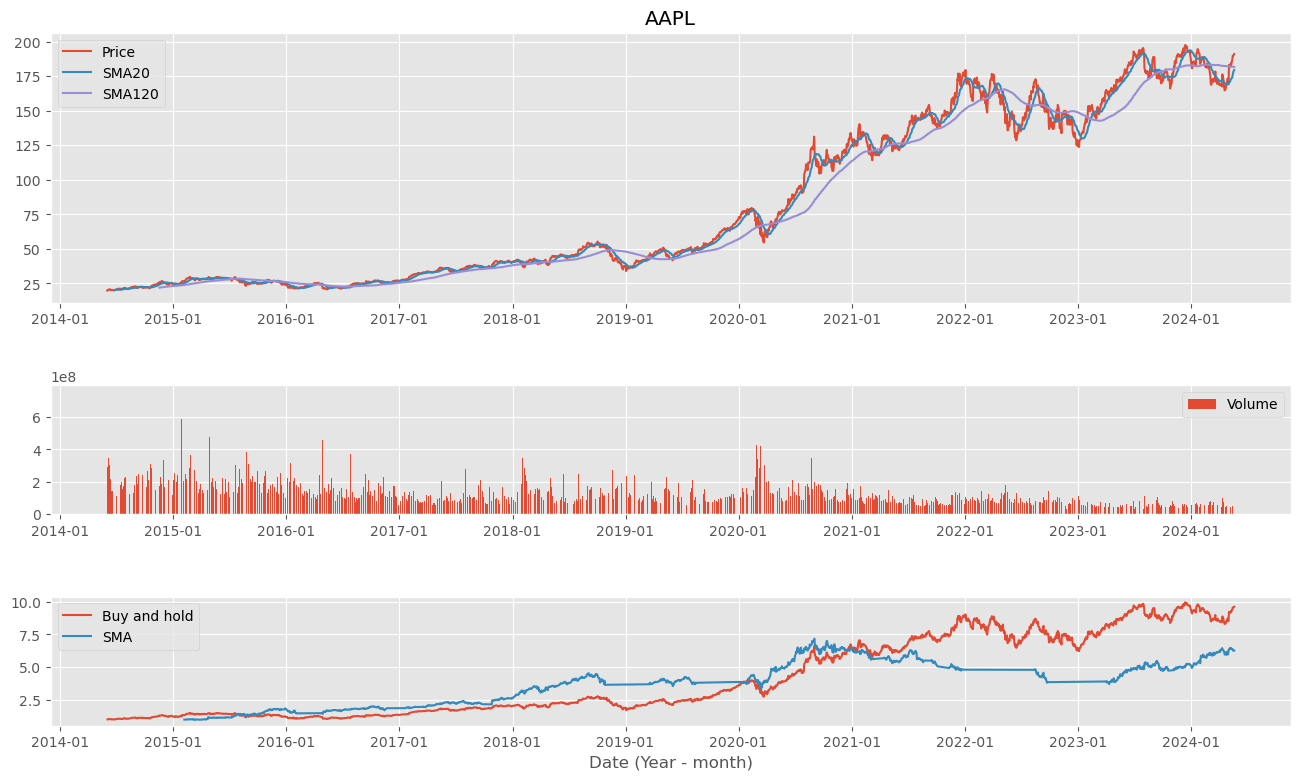

In [79]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')

ax2.bar(data.index, data['Volume'], label = 'Volume')
ax3.plot(data['Buy_and_hold'], label = 'Buy and hold')
ax3.plot(sma['Return'], label = 'SMA')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()


In [80]:
data.tail()

,Adj Close,Volume,SMA20,SMA120,rtn,Buy_and_hold
Date,,,,,,
2024-05-14,187.429993,52393600,174.736253,181.770830,0.006173,9.437851
2024-05-15,189.720001,70400000,175.833630,181.767337,0.012218,9.553162
2024-05-16,189.839996,52845200,176.984943,181.759275,0.000632,9.559204
2024-05-17,189.869995,41282900,178.239618,181.762601,0.000158,9.560714
2024-05-20,191.039993,44361300,179.510850,181.777173,0.006162,9.619629


In [81]:
data['Buy_and_hold'][-1]

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\3123283541.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Buy_and_hold'][-1]


9.619628503227338

In [82]:
sma.tail()

,Adj Close,Volume,SMA20,SMA120,EWM12,EWM26,Price_yesterday,Change,Invested_SMA,Invested_EWM,Buy_and_hold,Return,rtn
Date,,,,,,,,,,,,,
2024-05-14,187.070007,38698200,182.187500,167.127166,185.572949,183.307754,186.570007,1.002680,1,1,12.114364,6.392400,0.002680
2024-05-15,185.990005,75459900,182.423000,167.477916,185.637111,183.506440,187.070007,0.994227,1,1,12.044424,6.355495,-0.005773
2024-05-16,183.630005,38834500,182.643501,167.785583,185.328326,183.515593,185.990005,0.987311,1,1,11.891594,6.274851,-0.012689
2024-05-17,184.699997,33175700,183.147000,168.101916,185.231660,183.603326,183.630005,1.005827,1,1,11.960885,6.311414,0.005827
2024-05-20,183.539993,30511800,183.462500,168.400333,184.971403,183.598635,184.699997,0.993720,1,1,11.885765,6.271775,-0.006280


In [26]:
sma['Return'][-1]

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\3622598113.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sma['Return'][-1]


3.4143412976644654

### Medie mobili esponenziali

https://www.investopedia.com/terms/e/ema.asp

https://capital.com/it/media-mobile-esponenziale#:~:text=Che%20cos'%C3%A8%20un%20indicatore%20di%20media%20mobile%20esponenziale%20(EMA)%3F,-La%20media%20mobile&text=%C3%88%20un%20tipo%20di%20media,resistenza%20per%20eseguire%20la%20negoziazione.

In [85]:
#data['Price_yesterday'] = data['Adj Close'].shift(1)
#data['Change'] = data['Adj Close'] / data['Price_yesterday']
data['EWM12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
data['EWM26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['Invested_EWM'] = [1 if data.loc[i, 'EWM12'] > data.loc[i, 'EWM26'] 
                        else 0 for i in data.index]
ewm = data[data['Invested_EWM'] == 1].copy()
ewm['Price_yesterday'] = ewm['Adj Close'].shift(1)
ewm['Change'] = ewm['Adj Close'] / ewm['Price_yesterday']
ewm.loc[:,'Return'] = np.cumprod(ewm['Change'])

In [86]:
ewm.head()

,Adj Close,Volume,SMA20,SMA120,rtn,Buy_and_hold,EWM12,EWM26,Invested_EWM,Price_yesterday,Change,Return
Date,,,,,,,,,,,,
2014-06-03,20.140238,292709200,NaN,NaN,0.014142,1.014142,19.902601,19.880197,1,NaN,NaN,NaN
2014-06-04,20.370209,335482000,NaN,NaN,0.011418,1.025722,19.974540,19.916494,1,20.140238,1.011418,1.011418
2014-06-05,20.450134,303805600,NaN,NaN,0.003924,1.029746,20.047709,19.956023,1,20.370209,1.003924,1.015387
2014-06-06,20.393906,349938400,NaN,NaN,-0.002750,1.026915,20.100970,19.988459,1,20.450134,0.997250,1.012595
2014-06-09,20.720242,301660000,NaN,NaN,0.016002,1.043347,20.196242,20.042665,1,20.393906,1.016002,1.028798


Confronto delle tre strategie

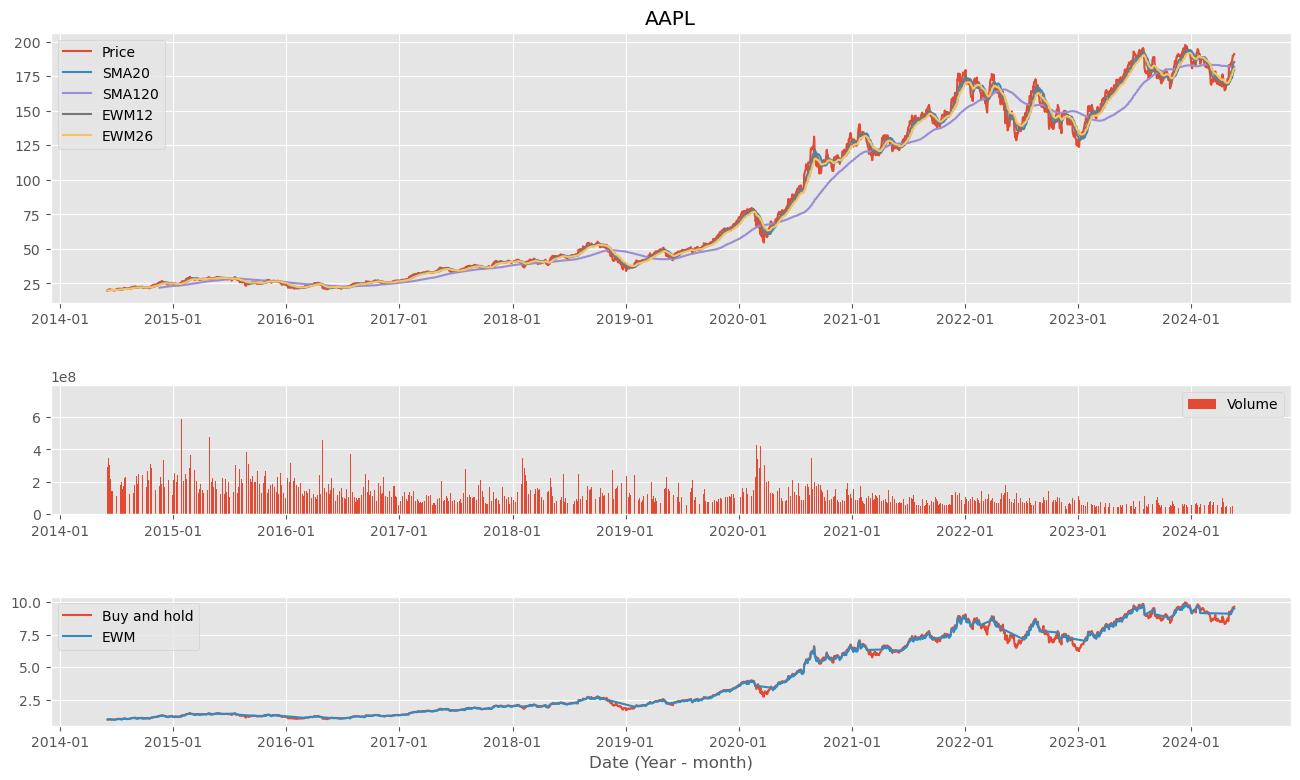

In [87]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['SMA20'], label = 'SMA20')
ax1.plot(data['SMA120'], label = 'SMA120')
ax1.plot(data['EWM12'], label = 'EWM12')
ax1.plot(data['EWM26'], label = 'EWM26')

ax2.bar(data.index, data['Volume'], label = 'Volume')
ax3.plot(data['Buy_and_hold'], label = 'Buy and hold')
#ax3.plot(sma['Return'], label = 'SMA')
ax3.plot(ewm['Return'], label ='EWM')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()


### Simulazione con più titoli

In [91]:
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN']
for ticker in tickers:
    data = yf.download(ticker, start, end)
    #data = web.DataReader(ticker, 'yahoo', start, end)
    data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
    data.loc[:,'SMA20'] = data['Adj Close'].rolling(20).mean()
    data.loc[:,'SMA120'] = data['Adj Close'].rolling(120).mean()
    data.loc[:,'EWM12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
    data.loc[:,'EWM26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
    data.loc[:,'Price_yesterday'] = data['Adj Close'].shift(1)
    data.loc[:,'Change'] = data['Adj Close'] / data['Price_yesterday']
    data.loc[:,'Invested_SMA'] = [1 if data.loc[i, 'SMA20'] > data.loc[i, 'SMA120'] 
                        else 0 for i in data.index]
    data.loc[:,'Invested_EWM'] = [1 if data.loc[i, 'EWM12'] > data.loc[i, 'EWM26'] 
                        else 0 for i in data.index]
    data.loc[:,'Buy_and_hold'] = np.cumprod(data['Change'])
    sma = data[data['Invested_SMA'] == 1].copy()
    sma.loc[:,'Return'] = np.cumprod(sma['Change'])
    ewm = data[data['Invested_EWM'] == 1].copy()
    ewm.loc[:,'Return'] = np.cumprod(ewm['Change'])
    print('Buy and hold strategy return: ' + ticker + ' '+   str(data['Buy_and_hold'][-1]))
    print('SMA return: ' + ticker + ' ' + str(sma['Return'][-1]))
    print('EWM return: ' + ticker + ' ' + str(ewm['Return'][-1]))


[*********************100%%**********************]  1 of 1 completed
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Buy and hold strategy return: ' + ticker + ' '+   str(data['Buy_and_hold'][-1]))
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('SMA return: ' + ticker + ' ' + str(sma['Return'][-1]))
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

Buy and hold strategy return: AAPL 9.619628503227338
SMA return: AAPL 3.4143412976644654
EWM return: AAPL 14.118729603327507
Buy and hold strategy return: KO 2.1035491729394895
SMA return: KO 1.1968001809338717
EWM return: KO 1.9388289484066887


[*********************100%%**********************]  1 of 1 completed
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Buy and hold strategy return: ' + ticker + ' '+   str(data['Buy_and_hold'][-1]))
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('SMA return: ' + ticker + ' ' + str(sma['Return'][-1]))
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

Buy and hold strategy return: MSFT 12.249790847796232
SMA return: MSFT 4.790806205330967
EWM return: MSFT 10.527723183452729
Buy and hold strategy return: TSLA 12.819980366981023
SMA return: TSLA 4.458981395007409
EWM return: TSLA 70.67661569646165



C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Buy and hold strategy return: ' + ticker + ' '+   str(data['Buy_and_hold'][-1]))
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('SMA return: ' + ticker + ' ' + str(sma['Return'][-1]))
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

Buy and hold strategy return: AMZN 11.885765358204381
SMA return: AMZN 6.271774908848906
EWM return: AMZN 20.29057994775993


C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Buy and hold strategy return: ' + ticker + ' '+   str(data['Buy_and_hold'][-1]))
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('SMA return: ' + ticker + ' ' + str(sma['Return'][-1]))
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\1593240134.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFr

### Relative Strength Index (RSI)

Il Relative Strength Index (RSI), o indice di forza relativa, è uno fra gli oscillatori più popolari dell'analisi tecnica e comunemente usati dai traders, in particolar modo da quelli che operano sui mercati dei futures. Fu ideato da John Welles Wilder, che lo pubblicò nel suo libro New Concepts in Technical Trading System nel 1978.

Si tratta di un indicatore di momentum, che riesce però ad ovviare ad alcuni problemi presenti nel momentum, nel Rate of change o in altri oscillatori di questo tipo. Questi generano notevoli complicazioni nella loro interpretazione, soprattutto quando si verificano bruschi movimenti del mercato causandone un'improvvisa inversione della linea. È quindi necessario, per una corretta e più comprensibile analisi, minimizzare queste distorsioni.

Il Relative Stregth Index, oltre a risolvere questo problema, presenta una banda d'oscillazione costante, da 0 a 100, che permette una comparazione dei valori con alcuni livelli costanti prestabiliti.

Va comunque sottolineato come il termine "indice di forza relativa" sia improprio, generando confusione anche in chi lo utilizza regolarmente. Infatti, con "forza relativa" solitamente si intende un grafico lineare che mette in rapporto due differenti entità, come per esempio un'azione e il suo indice di appartenenza, due indici settoriali, una materia prima e un cambio monetario, ecc. L'indice ideato da Wilder non misura alcuna di queste correlazioni, traendo quindi in inganno.

Per la creazione di questo oscillatore è necessario stabilire un solo parametro, a differenza di altri, che ne richiedono due o più. In questo caso si tratta del numero di periodi che si vuole considerare. Wilder consigliava l'utilizzo di 14 periodi. La formula è la seguente:

�
𝑆 
 �
 
 10 
 ∗
�
/
)

 00*U/
}{(U+D)}} dove
U = media delle differenze di chiusura al ria
lzo di X giorni
D = media del valore assoluto delle differenze di chiusura al ribasso di X giorni

Per individuare la media del valore rialzista bisogna sommare il totale delle differenze alla chiusura dei giorni di rialzo e dividere poi per i periodi considerati, mentre per quella ribassista bisogna sommare il numero totale dei valori assoluti delle differenze di chiusura durante giorni di ribasso e dividere sempre per il numero di periodi considerati. Ovviamente, come per tutti gli oscillatori, più si utilizzeranno periodi brevi, più si otterrà un oscillatore sensibile e con un'ampiezza maggiore, generando d'altra parte un maggior numero di falsi segnali.

Presentando una banda d'escursione costante, da 0 a 100, è possibile individuare zone fisse in cui l'oscillatore si trovi in una situazione di estremo; saranno quindi considerate zone di ipercomprato quando l'oscillatore segnerà valori superiori a 70, mentre saremo in ipervenduto qualora segnasse valori inferiori al 30. Valori consigliati dal suo ideatore.

I segnali generati da questo oscillatore sono simili a quelli di molti altri. La linea mediana del 50 va pure considerata ma pur sempre in subordine rispetto ai valori 30 e 70. Molto importanti e interessanti sono anche le divergenze rialziste o ribassiste in relazione al corso dei prezzi sul grafico. Questi segnali sono da monitorare molto attentamente in quanto possono essere catalogati come situazioni assai pregnanti; lo stesso ideatore considerava le divergenze una caratteristica tra le più indicative di questo oscillatore.

Va comunque ricordato come un forte mercato generi prematuramente segnali di ipercomprato o ipervenduto e questo può portare a precipitose uscite da un trend ancora potenzialmente valido; infatti a volte le fasi di ipercomprato durante un mercato rialzista possono durare a lungo, come quelle di ipervenduto durante un mercato ribassista.

Ulteriore sistema per identificare segnali di ingresso e uscita dal mercato grazie a questo oscillatore è mediante l'utilizzo delle linee di 30 e 70, che delimitano le situazioni di estremo. Nel caso per esempio di un mercato ribassista che venga a generare una situazione di ipervenduto, con l'oscillatore quindi ben al di sotto della linea del 30, potrebbe essere interessante prendere posizioni rialziste una volta che il valore si sia riportato al di sopra di tale livello. Si tratterebbe di un'entrata con un discreto margine di rischio, ma che potrebbe rivelarsi ottimo e tempestivo ingresso in vista di un nuovo movimento rialzista.

Col passare del tempo, i Trader e gli Analisti si sono resi conto che l'oscillatore genera altri interessanti segnali di acquisto e di vendita, come doppi minimi e doppi massimi, testa e spalle, supporti e resistenze, anche quando non apphttps://it.wikipedia.org/wiki/Relative_Strength_Index grafico.

Fonte: Wikipedia

In [92]:
#start = dt.datetime(2015, 1, 1)
#end = dt.datetime(2022,11,29)
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN']
ticker = 'TSLA'
data = yf.download(ticker, start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])

[*********************100%%**********************]  1 of 1 completed


In [95]:
data['abs_change'] = data['Adj Close'].diff(1)
data['up'] = [1 if data.loc[i, 'abs_change'] >  0 else 0 for i in data.index]
data['down'] = [1 if data.loc[i, 'abs_change'] <  0 else 0 for i in data.index]

In [96]:
data.head(20)

,Adj Close,Volume,abs_change,up,down
Date,,,,,
2014-06-02,13.646667,70021500,NaN,0,0
2014-06-03,13.662667,57912000,0.016001,1,0
2014-06-04,13.599333,51411000,-0.063334,0,1
2014-06-05,13.793333,60819000,0.194000,1,0
2014-06-06,13.878000,46107000,0.084667,1,0
2014-06-09,13.687333,42085500,-0.190667,0,1
2014-06-10,13.486667,52720500,-0.200666,0,1
2014-06-11,13.631333,59662500,0.144667,1,0
2014-06-12,13.568000,89905500,-0.063334,0,1


In [97]:
data['positive_movement'] = data['up'] * data['abs_change']
data['negative_movement'] = data['down'] * data['abs_change'] * - 1

In [98]:
data.head(20)

,Adj Close,Volume,abs_change,up,down,positive_movement,negative_movement
Date,,,,,,,
2014-06-02,13.646667,70021500,NaN,0,0,NaN,NaN
2014-06-03,13.662667,57912000,0.016001,1,0,0.016001,-0.000000
2014-06-04,13.599333,51411000,-0.063334,0,1,-0.000000,0.063334
2014-06-05,13.793333,60819000,0.194000,1,0,0.194000,-0.000000
2014-06-06,13.878000,46107000,0.084667,1,0,0.084667,-0.000000
2014-06-09,13.687333,42085500,-0.190667,0,1,-0.000000,0.190667
2014-06-10,13.486667,52720500,-0.200666,0,1,-0.000000,0.200666
2014-06-11,13.631333,59662500,0.144667,1,0,0.144667,-0.000000
2014-06-12,13.568000,89905500,-0.063334,0,1,-0.000000,0.063334


In [99]:
data['avg_gain'] = data['positive_movement'].rolling(14).mean()
data['avg_loss'] = data['negative_movement'].rolling(14).mean()

In [100]:
data.head(20)

,Adj Close,Volume,abs_change,up,down,positive_movement,negative_movement,avg_gain,avg_loss
Date,,,,,,,,,
2014-06-02,13.646667,70021500,NaN,0,0,NaN,NaN,NaN,NaN
2014-06-03,13.662667,57912000,0.016001,1,0,0.016001,-0.000000,NaN,NaN
2014-06-04,13.599333,51411000,-0.063334,0,1,-0.000000,0.063334,NaN,NaN
2014-06-05,13.793333,60819000,0.194000,1,0,0.194000,-0.000000,NaN,NaN
2014-06-06,13.878000,46107000,0.084667,1,0,0.084667,-0.000000,NaN,NaN
2014-06-09,13.687333,42085500,-0.190667,0,1,-0.000000,0.190667,NaN,NaN
2014-06-10,13.486667,52720500,-0.200666,0,1,-0.000000,0.200666,NaN,NaN
2014-06-11,13.631333,59662500,0.144667,1,0,0.144667,-0.000000,NaN,NaN
2014-06-12,13.568000,89905500,-0.063334,0,1,-0.000000,0.063334,NaN,NaN


In [101]:
data['RS'] = data['avg_gain'] / data['avg_loss']
data['RSI'] = 100 - (100 / (1 + data['RS']))

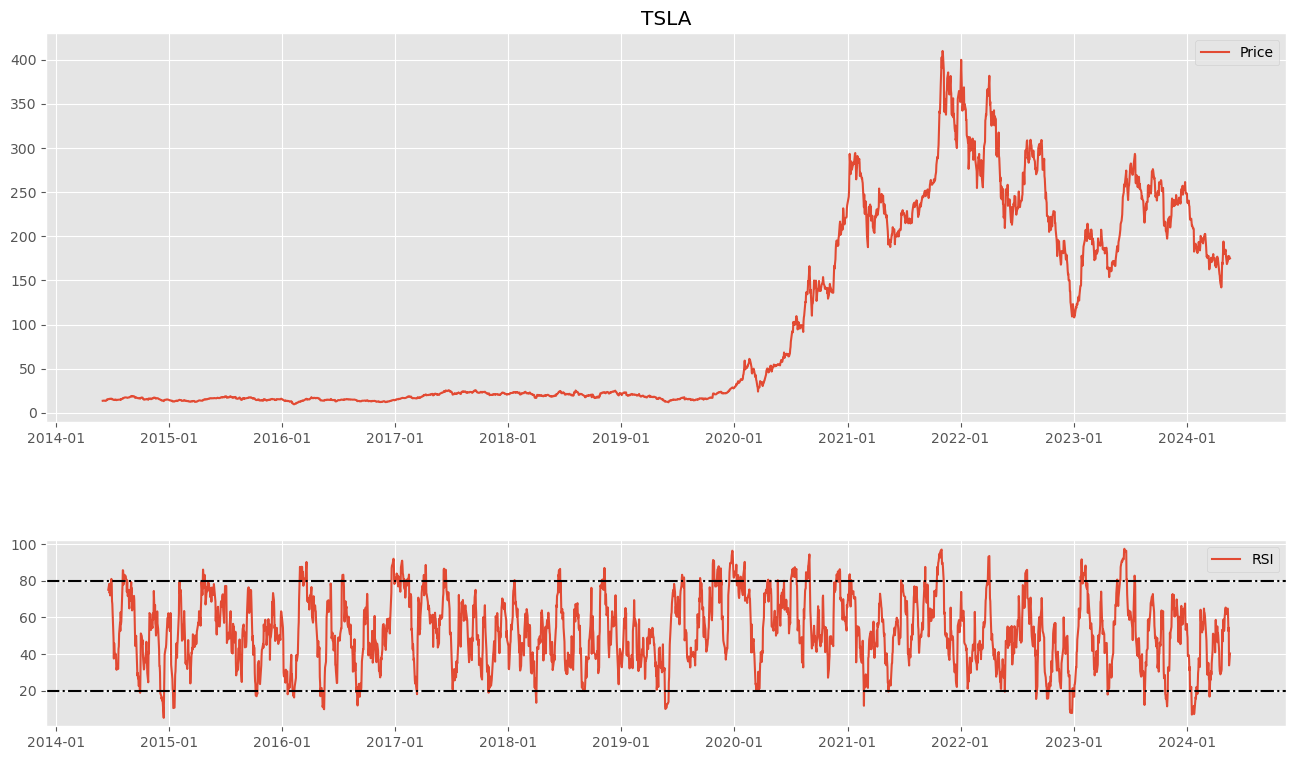

In [102]:
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((7,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((7,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax2.plot(data['RSI'], label = 'RSI')
ax2.axhline(80, linestyle = '-.', color = 'black')
ax2.axhline(20, linestyle = '-.', color = 'black')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.legend()
ax2.legend()
plt.show()         

#### RSI - Simulazione con più titoli

In [103]:
start = dt.datetime(2014, 5, 31)
end = dt.datetime(2024,5,21)
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']
results = pd.DataFrame(columns = ['Ticker', 'RSI'])


In [104]:
for ticker in tickers:
    print(ticker)
    data = yf.download(ticker, start, end, progress = False)
    data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
    data['abs_change'] = data['Adj Close'].diff(1)
    data['up'] = [1 if data.loc[i, 'abs_change'] >  0 else 0 for i in data.index]
    data['down'] = [1 if data.loc[i, 'abs_change'] <  0 else 0 for i in data.index]
    data['positive_movement'] = data['up'] * data['abs_change']
    data['negative_movement'] = data['down'] * data['abs_change'] * - 1
    data['avg_gain'] = data['positive_movement'].rolling(14).mean()
    data['avg_loss'] = data['negative_movement'].rolling(14).mean()
    data['RS'] = data['avg_gain'] / data['avg_loss']
    data['RSI'] = 100 - (100 / (1 + data['RS']))
    print(data['RSI'].tail(1))
    
    #new_row = {'Ticker': ticker, 'RSI': data['RSI'][-1]}
    #results = results.append(new_row, ignore_index = True)
    

AAPL
Date
2024-05-20    86.262991
Name: RSI, dtype: float64
KO
Date
2024-05-20    62.269905
Name: RSI, dtype: float64
MSFT
Date
2024-05-20    84.716736
Name: RSI, dtype: float64
TSLA
Date
2024-05-20    40.307186
Name: RSI, dtype: float64
AMZN
Date
2024-05-20    66.998408
Name: RSI, dtype: float64
BAC
Date
2024-05-20    74.133327
Name: RSI, dtype: float64


### Bande di Bollinger

Le bande di Bollinger si basano sulla volatilità di un titolo. La volatilità è misurata come deviazione standard (standard deviation) - statisticamente definita come scarto quadratico medio o radice quadrata della varianza.

Per calcolare le bande di Bollinger si usa dapprima una media mobile a G giorni (spesso 20) a cui viene aggiunto o sottratto il valore della deviazione standard moltiplicata per un determinato fattore F (spesso intorno a 2).

La banda superiore è quindi ottenuta aggiungendo alla media mobile F volte la deviazione standard. La banda centrale (se la si vuole visualizzare) è data dalla media mobile. La banda inferiore è calcolata sottraendo alla media mobile F volte la deviazione standard.

Una maggiore ampiezza delle bande corrisponde a un'alta volatilità. Una minore ampiezza corrisponde viceversa a una bassa volatilità. Bande convergenti rappresentano volatilità in diminuzione. Bande divergenti rappresentano volatilità in aumento.

È possibile variare leggermente i parametri G ed F. Valori che secondo lo stesso Bollinger possono essere utilizzati sono i seguenti:

G = 20 e F = 2 Valido in generale;
G = 10 e F = 1.9 Se c'è la necessità di usare una media mobile molto corta;
G = 50 e F = 2.1 Se c'è la necessità di usare una media mobile molto lunga.
Lo stesso John Bollinger consiglia di non variare la lunghezza della Media Mobile (G) ma piuttosto di passare da barre daily a barre settimanali o mensili (per trading a lungo termine) o a barre di 1 ora o 5 minuti (per trading intraday).

Approssimativamente, dal punto di vista operativo, le bande di Bollinger danno segnali di acquisto e vendita quando si verificano le seguenti condizioni:

- quando il grafico del prezzo esce dalla banda superiore e successivamente vi rientra, si ottiene un segnale di vendita; questo corrisponde a un rapido aumento del prezzo e a un successivo rallentamento o aggiustamento;
- quando il grafico del prezzo esce dalla banda inferiore e successivamente vi rientra, si ottiene un segnale di acquisto; cioè il prezzo è calato molto velocemente fino ad arrestarsi e -probabilmente- a invertire il trend.

In realtà le bande di Bollinger da sole possono dare falsi segnali in quanto per esempio il grafico potrebbe uscire in basso, rientrare e continuare il trend discendente. Per questo motivo, John Bollinger consiglia di utilizzare altri indicatori, non correlati, per testare il comportamento delle bande. Quando 2 o più indicatori confermano il comportamento delle bande, allora il segnale acquista significato (sempre nei limiti della relativa validità predittiva della Analisi Tecnica).

https://it.wikipedia.org/wiki/Bande_di_Bollinger

[*********************100%%**********************]  1 of 1 completed


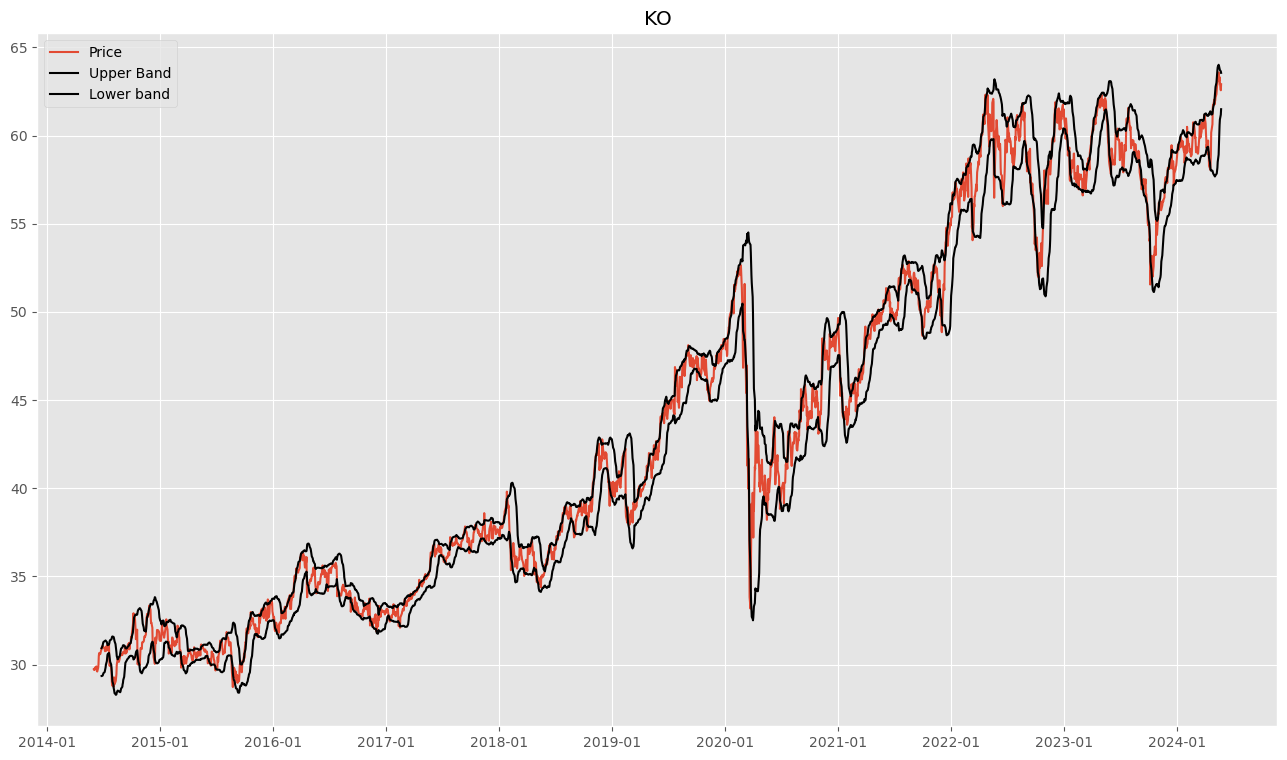

In [109]:
start = dt.datetime(2014, 5, 31)
end = dt.datetime(2024,5,22)
#tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']
ticker = 'KO'
#results = pd.DataFrame(columns = ['Ticker', 'RSI'])
data = yf.download(ticker, start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
data['20_MA'] = data['Adj Close'].rolling(20).mean()
data['20_std'] = data['Adj Close'].rolling(20).std()
data['Upper_band'] = data['20_MA'] + 1.65 * data['20_std']
data['Lower_band'] = data['20_MA'] - 1.65 * data['20_std']



plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((1,1), (0,0), rowspan = 1, colspan = 1, title = ticker)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['Upper_band'], label = 'Upper Band', color = 'black')
ax1.plot(data['Lower_band'], label = 'Lower band', color = 'black')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax1.legend()
plt.show()         

[*********************100%%**********************]  1 of 1 completed


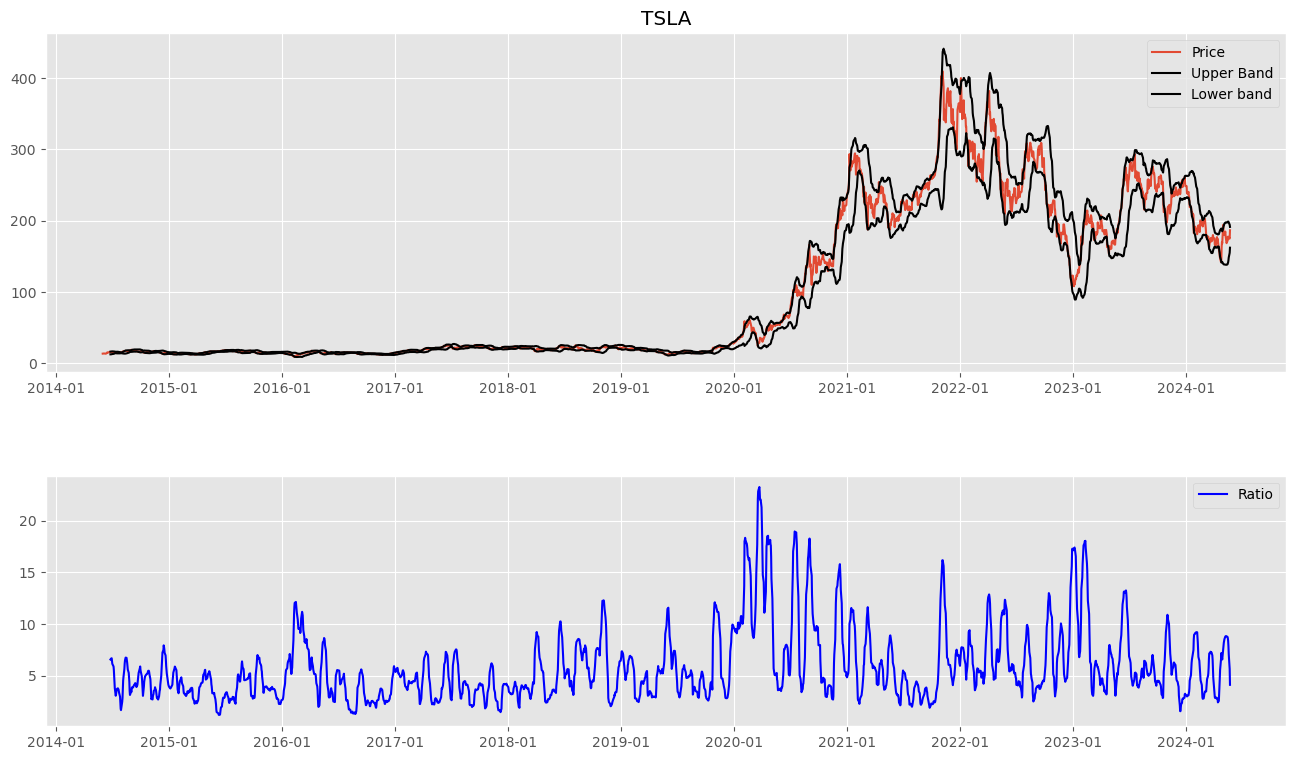

In [111]:
start = dt.datetime(2014, 5, 31)
end = dt.datetime(2024,5,22)
tickers = ['AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']
ticker = 'TSLA'
results = pd.DataFrame(columns = ['Ticker', 'RSI'])
data = yf.download(ticker, start, end)
data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
data['20_MA'] = data['Adj Close'].rolling(20).mean()
data['20_std'] = data['Adj Close'].rolling(20).std()
data['Upper_band'] = data['20_MA'] + 2 * data['20_std']
data['Lower_band'] = data['20_MA'] - 2 * data['20_std']
data['Ratio'] = data['20_std'] / data['20_MA'] * 100


plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 4, colspan = 1, title = ticker)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1, sharex = ax1)
ax1.plot(data['Adj Close'], label = 'Price')
ax1.plot(data['Upper_band'], label = 'Upper Band', color = 'black')
ax1.plot(data['Lower_band'], label = 'Lower band', color = 'black')
ax2.plot(data['Ratio'], label = 'Ratio', color = 'blue')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')
ax1.legend()
ax2.legend()
plt.show()         

Misuriamo il ratio su più titoli - Uno "screener"

In [112]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2021,11,26)
tickers = ['^GSPC','AAPL', 'KO', 'MSFT', 'TSLA', 'AMZN','BAC']

results = pd.DataFrame(columns = ['Ticker', 'Ratio'])

for ticker in tickers:
    data = yf.download(ticker, start, end)
    data = data.drop(columns = ['High', 'Low', 'Open', 'Close'])
    data['20_MA'] = data['Adj Close'].rolling(20).mean()
    data['20_std'] = data['Adj Close'].rolling(20).std()
    data['Upper_band'] = data['20_MA'] + 2 * data['20_std']
    data['Lower_band'] = data['20_MA'] - 2 * data['20_std']
    data['Ratio'] = data['20_std'] / data['20_MA'] * 100
    
    new_row = {'Ticker': ticker, 'Ratio': data['Ratio'][-1]}
    results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)
    #results = results.append(new_row, ignore_index = True)

print(results)

[*********************100%%**********************]  1 of 1 completed
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\276673540.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_row = {'Ticker': ticker, 'Ratio': data['Ratio'][-1]}
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\276673540.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)
[*********************100%%**********************]  1 of 1 completed
C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\2766

  Ticker     Ratio
0  ^GSPC  0.739524
1   AAPL  3.121412
2     KO  0.886652
3   MSFT  1.373586
4   TSLA  6.057613
5   AMZN  2.944710
6    BAC  1.452901


C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23196\276673540.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_row = {'Ticker': ticker, 'Ratio': data['Ratio'][-1]}


### MACD con "Signal line" - 2

Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.

The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. Traders may buy the security when the MACD crosses above its signal line and sell—or short—the security when the MACD crosses below the signal line. Moving average convergence divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.

MACD=12-Period EMA − 26-Period EMA
﻿

MACD is calculated by subtracting the long-term EMA (26 periods) from the short-term EMA (12 periods). An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.

The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.

The MACD has a positive value (shown as the blue line in the lower chart) whenever the 12-period EMA (indicated by the red line on the price chart) is above the 26-period EMA (the blue line in the price chart) and a negative value when the 12-period EMA is below the 26-period EMA. The more distant the MACD is above or below its baseline indicates that the distance between the two EMAs is growing.

In the following chart, you can see how the two EMAs applied to the price chart correspond to the MACD (blue) crossing above or below its baseline (dashed) in the indicator below the price chart.



In [113]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [114]:
start = dt.datetime(2022, 5, 31)
end = dt.datetime(2024,5, 21)
ticker = 'AAPL'
data = yf.download(ticker, start, end)

[*********************100%%**********************]  1 of 1 completed


In [115]:
exp1 = data['Close'].ewm(span=12, adjust = False).mean()
exp2 = data['Close'].ewm(span=26, adjust = False).mean()

In [116]:
data['MACD'] = exp1 - exp2
data['Signal line'] = data['MACD'].ewm(span=9, adjust = False).mean()

In [117]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
Date,,,,,,,,
2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600,3.865564,2.238890
2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000,4.292488,2.649610
2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200,4.587628,3.037214
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900,4.768976,3.383566
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300,4.950043,3.696861


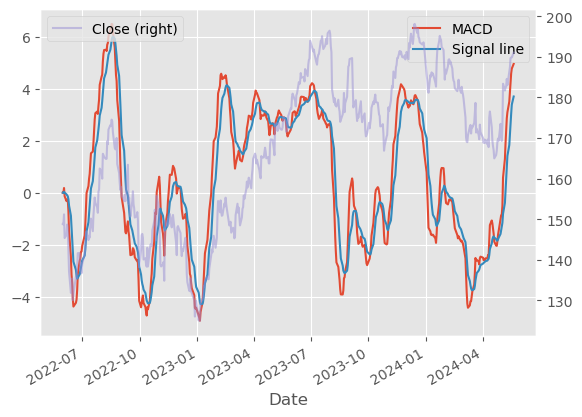

In [118]:
%matplotlib inline
fig, ax = plt.subplots()
data[['MACD', 'Signal line']].plot(ax=ax)
data['Close'].plot(ax = ax, alpha = 0.50, secondary_y = True)
plt.legend();

### Stocastic Oscillator

A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. The sensitivity of the oscillator to market movements is reducible by adjusting that time period or by taking a moving average of the result. It is used to generate overbought and oversold trading signals, utilizing a 0–100 bounded range of values.
The Formula for the Stochastic Oscillator Is
\begin{aligned} &\text{\%K}=\left(\frac{\text{C} - \text{L14}}{\text{H14} - \text{L14}}\right)\times100\\ &\textbf{where:}\\ &\text{C = The most recent closing price}\\ &\text{L14 = The lowest price traded of the 14 previous}\\ &\text{trading sessions}\\ &\text{H14 = The highest price traded during the same}\\ &\text{14-day period}\\ &\text{\%K = The current value of the stochastic indicator}\\ \end{aligned} 
  
%K=( 
H14−L14
C−L14
 )×100
where:
C = The most recent closing price
L14 = The lowest price traded of the 14 previous
trading sessions
H14 = The highest price traded during the same
14-day period
%K = The current value of the stochastic indicator
​
 
﻿

Notably, %K is referred to sometimes as the fast stochastic indicator. The "slow" stochastic indicator is taken as %D = 3-period moving average of %K.

The general theory serving as the foundation for this indicator is that in a market trending upward, prices will close near the high, and in a market trending downward, prices close near the low. Transaction signals are created when the %K crosses through a three-period moving average, which is called the %D.

The difference between the slow and fast Stochastic Oscillator is the Slow %K incorporates a %K slowing period of 3 that controls the internal smoothing of %K. Setting the smoothing period to 1 is equivalent to plotting the Fast Stochastic Oscillator.1﻿

What Does the Stochastic Oscillator Tell You?
The stochastic oscillator is range-bound, meaning it is always between 0 and 100. This makes it a useful indicator of overbought and oversold conditions. Traditionally, readings over 80 are considered in the overbought range, and readings under 20 are considered oversold. However, these are not always indicative of impending reversal; very strong trends can maintain overbought or oversold conditions for an extended period. Instead, traders should look to changes in the stochastic oscillator for clues about future trend shifts.

Stochastic oscillator charting generally consists of two lines: one reflecting the actual value of the oscillator for each session, and one reflecting its three-day simple moving average. Because price is thought to follow momentum, the intersection of these two lines is considered to be a signal that a reversal may be in the works, as it indicates a large shift in momentum from day to day.

Divergence between the stochastic oscillator and trending price action is also seen as an important reversal signal. For example, when a bearish trend reaches a new lower low, but the oscillator prints a higher low, it may be an indicator that bears are exhausting their momentum and a bullish reversal is brewing.



In [119]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14) * 100 / (high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

In [120]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,%K,%D
Date,,,,,,,,,,
2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600,3.865564,2.238890,95.682333,91.289166
2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000,4.292488,2.649610,95.682484,95.813153
2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200,4.587628,3.037214,94.270080,95.211632
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900,4.768976,3.383566,94.406500,94.786355
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300,4.950043,3.696861,96.142021,94.939534


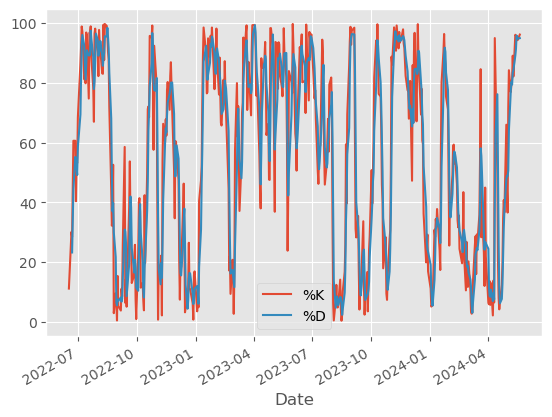

In [121]:
fig, ax = plt.subplots()
data[['%K', '%D']].plot(ax=ax);

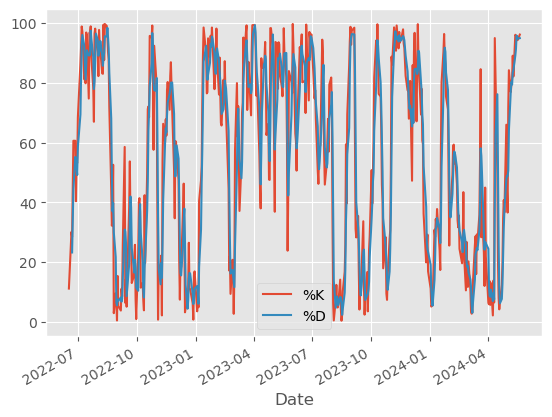

In [122]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2021-03-31':].plot(ax=ax);


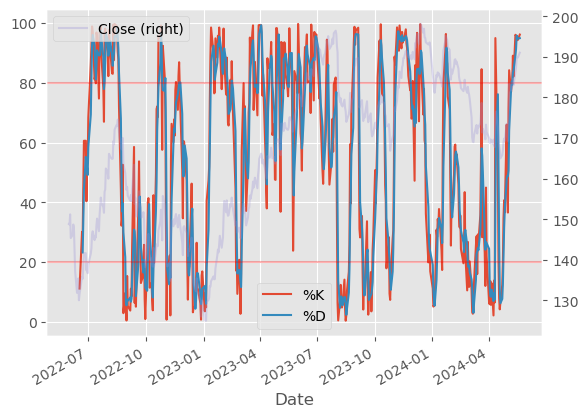

In [123]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2021-03-31':].plot(ax=ax)
ax.axhline(80, c = 'r', alpha = 0.3)
ax.axhline(20, c='r', alpha = 0.3)
data['Close'].loc['2021-03-31':].plot(ax=ax, alpha = 0.3, secondary_y = True)
plt.legend();